In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams

import scipy.stats as ss

import sys
sys.path.insert(0, '../util/')
from util import util

In [3]:
datapath = '/home/jw1624/H1-merian/csvs/breathingModes/'

## Set params

In [4]:
rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [5]:
matplotlib.rc('font', family='serif')
rcParams['axes.linewidth'] = 2
rcParams['xtick.major.width'] = 2
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.width'] = 2
rcParams['ytick.major.size'] = 10

rcParams['font.family'] = 'serif'

rcParams['text.usetex'] = False

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.transparent'] = False

## Looking at r431 first

In [13]:
df = pd.read_csv(datapath+'r431_qtys.txt')
df.head()

,galaxyID,timestep,t,dt,z,M_star,R_halflight,R_halfmass,sigma_gas,sigma_star,SFR_10,SFR_100,sSFR_10,sSFR_100
0,431,4096,13.800820,-1.000000,0.000000,1.486476e+09,4.186630,2.85,7.981416,45.101895,2.702323e+06,2.377159e+07,0.001818,0.015992
1,431,4032,13.400000,0.400820,0.030000,1.410000e+09,0.401532,-1.00,8.095398,17.884760,7.279541e+03,7.279541e+03,0.000005,0.000005
2,431,3936,12.900000,0.500000,0.060000,1.340000e+09,0.000128,-1.00,2.801852,17.053071,7.013348e+03,7.013348e+03,0.000005,0.000005
3,431,3648,12.500000,0.400000,0.090000,1.280000e+09,0.184130,-1.00,8.385788,19.995410,6.260617e+03,6.260617e+03,0.000005,0.000005
4,431,3606,12.151915,0.348085,0.124892,1.223316e+09,3.731433,2.45,6.932679,47.055990,2.360590e+06,1.882841e+07,0.001930,0.015391


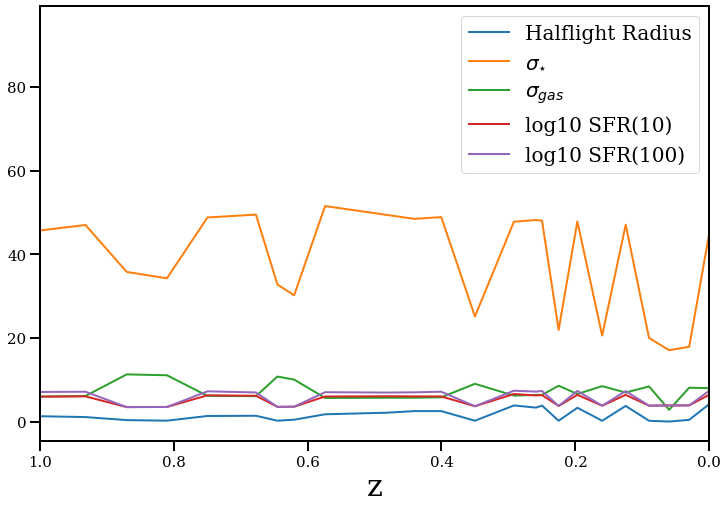

In [14]:
fig = plt.figure(facecolor='w', figsize=(12,8))

plt.plot(df['z'], df['R_halflight'], linewidth=2)
plt.plot(df['z'], df['sigma_star'], linewidth=2)
plt.plot(df['z'], df['sigma_gas'], linewidth=2)
plt.plot(df['z'], np.log10(df['SFR_10']), linewidth=2)
plt.plot(df['z'], np.log10(df['SFR_100']), linewidth=2)

plt.xlim([1.0,0])

plt.tick_params(axis='both', which='major', labelsize=15)

plt.legend(['Halflight Radius', r'$\sigma_{\star}$', r'$\sigma_{gas}$', 'log10 SFR(10)', 
            'log10 SFR(100)'], fontsize=20)

plt.xlabel('z', fontsize=30)

plt.savefig('figures/breathing/prelim.png')

## mstar over time

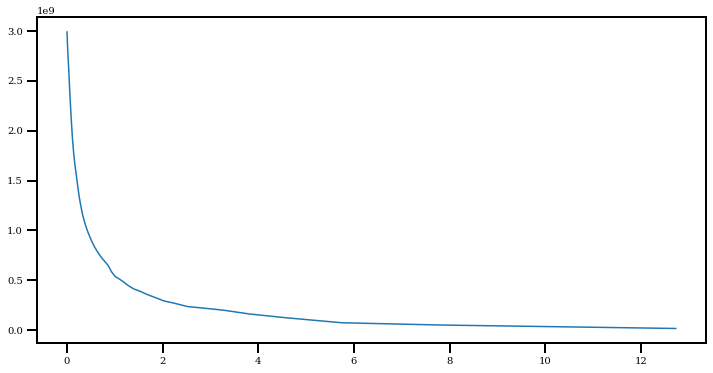

In [66]:
gal = cdmgals[9]
data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')

plt.figure(facecolor='w', figsize=(12,6))

plt.plot(data['z'], data['M_star'])

In [98]:
np.where(df['M_star']==max(df['M_star']))

(array([0]),)

## Three Panel Figure
R_hm, sSFR and sigma as functions of time

In [6]:
cdmgals = util.getGalaxies()[0]

In [130]:
data.head()

,galaxyID,timestep,t,z,M_star,R_halflight,R_halfmass,sigma_gas,sigma_star,SFR_10,SFR_100,sSFR_10,sSFR_100
0,568,4032,13.585453,0.015092,1.866664e+09,8926.666029,8926.95,28.480694,53.095399,5.324649e+06,3.979881e+07,0.002852,0.021321


Text(0.5, 0, 'Lookback Time [Gyr]')

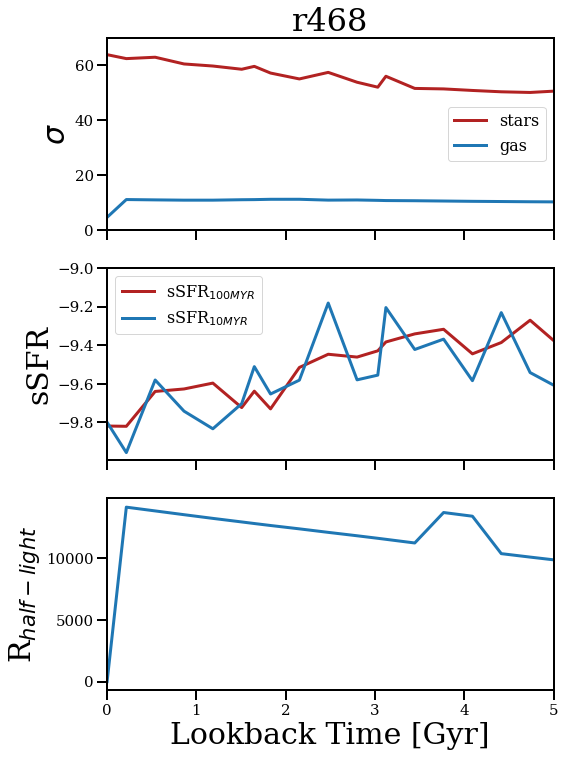

In [7]:
gal = cdmgals[1]
data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')

fig, axs = plt.subplots(3,1, facecolor='w', figsize=(8,12), sharex=True)
tlim = 5

axs[0].set_title('r'+str(gal), fontsize=32)

# get lookback time 
tlookback = abs(data['t'] - max(data['t']))

mask = tlookback<tlim

# top panel: sigma
sigStar = data['sigma_star'][tlookback<tlim+1]
sigGas = data['sigma_gas'][tlookback<tlim+1]

axs[0].plot(tlookback[tlookback<tlim+1], sigStar, linewidth=3, color='firebrick')
axs[0].plot(tlookback[tlookback<tlim+1], sigGas, linewidth=3, color='tab:blue')

axs[0].tick_params(axis='both', which='major', labelsize=15)

axs[0].set_ylabel(r'$\sigma$', fontsize=30)

axs[0].legend(['stars', 'gas'], fontsize=16)

axs[0].set_xlim([0,tlim])
axs[0].set_ylim([0,70])

# middle panel: sSFR
ssfr10 = data['sSFR_10'][tlookback<tlim+1]/1e7
ssfr100= data['sSFR_100'][tlookback<tlim+1]/1e8

axs[1].plot(tlookback[tlookback<tlim+1], np.log10(ssfr100), color='firebrick', linewidth=3)
axs[1].plot(tlookback[tlookback<tlim+1], np.log10(ssfr10), color='tab:blue', linewidth=3)

axs[1].tick_params(axis='both', which='major', labelsize=15)    

axs[1].set_ylabel('sSFR', fontsize=30)

axs[1].legend([r'sSFR$_{100MYR}$', r'sSFR$_{10MYR}$'], fontsize=16)

axs[1].set_ylim(top=-9)

# Bottom panel: half-light radius
Rhl = data['R_halflight'][tlookback<tlim+1]

axs[2].plot(tlookback[tlookback<tlim+1], Rhl, linewidth=3)

#axs[2].set_ylim([0,5])
axs[2].tick_params(axis='both', which='major', labelsize=15)

axs[2].set_ylabel(r'R$_{half-light}$', fontsize=30)

axs[2].set_xlabel('Lookback Time [Gyr]', fontsize=30)

#plt.savefig('../figures/breathing3panel/r'+str(gal)+'.png')

## Scatter sSFR_100 and log10 R_halflight (per galaxy)
Can make one of these for each galaxy and determine a correrlation coefficient

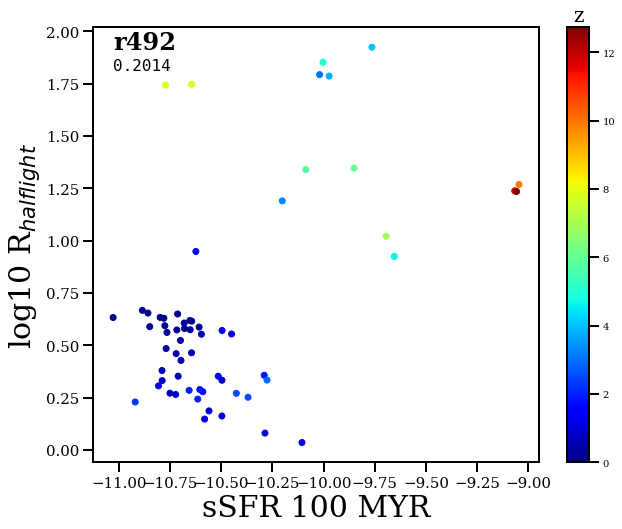

In [44]:
gal = cdmgals[2]
zmax = 14
ymin = -1

data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')

fig = plt.figure(figsize=(10,8), facecolor='w')

x = np.log10(data['sSFR_100'][data['z'] <= zmax]/10e8)
y = np.log10(data['R_halflight'][data['z'] <= zmax])
c = data['z'][data['z'] <= zmax]

c = c[y > ymin]
x = x[y > ymin]
y = y[y > ymin]

rs = ss.spearmanr(x,y)[0]

plt.scatter(x, y, c=c, cmap='jet')

plt.tick_params(axis='both', which='major', labelsize=15)    

plt.xlabel('sSFR 100 MYR', fontsize=30)
plt.ylabel(r'log10 R$_{halflight}$', fontsize=30)

plt.text(s='r'+str(gal), x=min(x[x>-20]), y=max(y)-0.01, fontsize=24, weight='bold')
plt.text(s=str(rs)[:6], x=min(x[x>-20]), y=max(y)-0.11, fontsize=16, fontfamily='monospace')

#plt.ylim([3,4.5])
#plt.xlim([0.0,0.4])

clb = plt.colorbar()
clb.ax.set_title('z', fontsize=20)

plt.savefig('../figures/breathingPerGal/r'+str(gal)+'.png')

## Scatter sSFR_100 and log10 R_halflight (population)

-0.5645409610242282

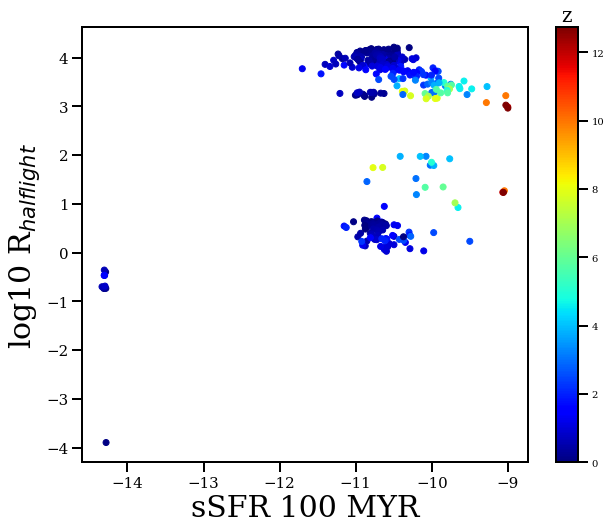

In [99]:
zmax = 15

ymin = -10
ymax = 100

fig = plt.figure(figsize=(10,8), facecolor='w')
xall = []
yall = []
call = []

for idx,gal in enumerate(cdmgals):
    if idx==1: continue
    
    data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')

    x = np.log10(data['sSFR_100'][data['z'] <= zmax]/10e8).to_numpy()
    y = np.log10(data['R_halflight'][data['z'] <= zmax]).to_numpy()
    c = data['z'][data['z'] <= zmax].to_numpy()
    
    c = c[y > ymin]
    x = x[y > ymin]
    y = y[y > ymin]

    c = c[y < ymax]
    x = x[y < ymax]
    y = y[y < ymax]
    
    for i,_ in enumerate(x):
        xall.append(x[i])
        yall.append(y[i])
        call.append(c[i])
    
rs = ss.spearmanr(x,y)[0]

plt.scatter(xall, yall, c=call, cmap='jet')

plt.tick_params(axis='both', which='major', labelsize=15)    

plt.xlabel('sSFR 100 MYR', fontsize=30)
plt.ylabel(r'log10 R$_{halflight}$', fontsize=30)

#plt.ylim([3,4.5])
#plt.xlim([0.0,0.4])

clb = plt.colorbar()
clb.ax.set_title('z', fontsize=20)

#plt.text(x=-11.4, y=4.2, s=r'z$\leq$'+str(zmax), fontsize=24, weight='bold')
#plt.text(x=-11.4, y=4.17,s=str(rs)[:6], fontsize=16, fontfamily='monospace')

#plt.savefig()

rs